In [37]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [40]:
%cd '/content/gdrive/My Drive/LDS8_Le Quang Anh Tu/week3/Chapter6'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-36c09bd74a56>", line 1, in <module>
    get_ipython().magic("cd '/content/gdrive/My Drive/LDS8_Le Quang Anh Tu/week3/Chapter6'")
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-91>", line 2, in cd
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is not co

OSError: ignored

In [39]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Ex1
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
np.random.seed(7)

In [41]:
df = pd.read_csv('singapore_tourist.csv', usecols=[1], engine='python')
df.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-8aabd216a73a>", line 1, in <module>
    df = pd.read_csv('singapore_tourist.csv', usecols=[1], engine='python')
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 454, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 948, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1191, in _make_engine
    self._engine = klass(self.f, **self.options)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 2389, in __init__
    memory_map=self.memory_map,

OSError: ignored

In [ ]:
dataset = df.values
dataset = dataset.astype('float32')
dataset[:5]

In [ ]:
#scaler dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [ ]:
#slipt into train and test
train_size = int(len(dataset) * 0.67)
#test size = len(dataset) - trainsize
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [ ]:
train[:5]

array([[0.01265821],
       [0.        ],
       [0.03797469],
       [0.01265821],
       [0.17721519]], dtype=float32)

In [ ]:
#reshape into X=t, Y = t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX[:5]

array([[0.01265821],
       [0.        ],
       [0.03797469],
       [0.01265821],
       [0.17721519]], dtype=float32)

In [ ]:
#reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,test.shape[1]))

In [ ]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))#1 cot vao va 1 cot ra
model.add(Dense(1)) #do ra co 1 gia tri
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainX, epochs= 100,batch_size=1)

Epoch 1/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2004
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1316
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0878
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0606
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0394
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 11/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 12/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 13/100
62/62 [=================

In [ ]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:

#invert predict(tra lại kết quả cũ trước khi scaler)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testPredict)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-4ae960c75b72>", line 3, in <module>
    trainY = scaler.inverse_transform([trainY])
  File "/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py", line 434, in inverse_transform
    force_all_finite="allow-nan")
  File "/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py", line 574, in check_array
    % (array.ndim, estimator_name))
ValueError: Found array with dim 3. Estimator expected <= 2.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the ab

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate predict
train_score = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train score: %.2f RMSE" % (train_score))
test_score = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test score: %.2f RMSE" % (test_score))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Train score: 0.14 RMSE
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-797b6f311aa9>", line 5, in <module>
    test_score = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  File "/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py", line 252, in mean_squared_error
    y_true, y_pred, multioutput)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py", line 84, in _check_reg_targets
    check_consistent_length(y_true, y_pred)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py", line 212, in check_consistent_length
    " samples: %r" % [int(l) for l in lengths])
ValueError: Found input variables with inconsistent numbers of samples: [1, 31]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

ValueError: ignored

In [42]:
#shift train predict for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
#shift test predict for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2)+1:len(dataset)-1, :] = testPredict

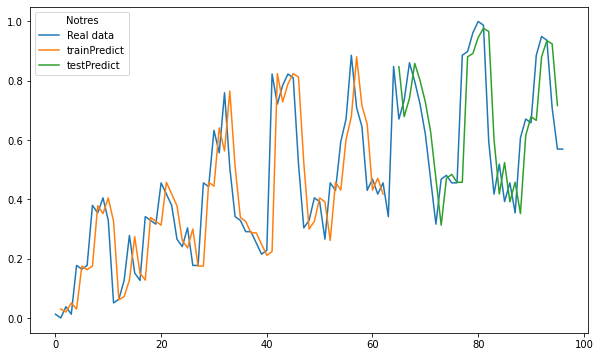

In [43]:
#plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label = 'Real data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title='Notres')
plt.show()

In [48]:
#x_new = 66 => next time
x_new = scaler.transform([[66]])
x_new = np.reshape(x_new, (1,1,1))

y_new = model.predict(x_new)
y_new = scaler.inverse_transform(y_new)
y_new

array([[2.163271]], dtype=float32)